In [1]:
# 🚀 Стохастический градиентный спуск (SGD) в Jupyter Notebook

import numpy as np
import matplotlib.pyplot as plt

# Линейная регрессия: предсказание веса человека методом SGD
## Решение методом стохастического градиентного спуска

## 1. Исходные данные
Те же данные, что и в обычном градиентном спуске:
$X = \begin{pmatrix} 
1.7 & 25 \\
1.8 & 30 \\
\vdots & \vdots \\
1.62 & 21
\end{pmatrix}$, 
$y = \begin{pmatrix} 
70 \\
80 \\
\vdots \\
58
\end{pmatrix}$

## 2. Нормализация данных
В отличие от обычного GD, здесь мы нормализуем данные:
$X_{norm} = \frac{X - \mu_X}{\sigma_X}$
$y_{norm} = \frac{y - \mu_y}{\sigma_y}$

где:
- $\mu_X, \sigma_X$ - среднее и стандартное отклонение признаков
- $\mu_y, \sigma_y$ - среднее и стандартное отклонение целевой переменной

## 3. Модель
$f_{\theta}(x) = w_1x_1 + w_2x_2 + b$

## 4. Функция потерь для одного примера
$L_i(\theta) = (y_i - f_{\theta}(x_i))^2$


In [64]:
# **1. Создаем данные**
X = np.array([
    [1.7, 25], [1.8, 30], [1.6, 20], [1.75, 35],
    [1.65, 40], [1.85, 45], [1.55, 18], [1.70, 29],
    [1.78, 33], [1.62, 21]
])
y = np.array([70, 80, 55, 78, 65, 90, 50, 74, 82, 58])

# **2. Нормализация данных**
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std  # Теперь значения будут в диапазоне ~[-1, 1]

y_mean = np.mean(y)
y_std = np.std(y)
y = (y - y_mean) / y_std  # Нормализация целевой переменной

# **3. Разделяем train и validation**
N = len(X)
split_idx = int(N * 0.8)
X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]

# **4. Инициализируем случайные веса**
w1, w2 = np.random.randn(), np.random.randn()
b = np.random.randn()

# 📌 Параметры обучения
learning_rate = 0.001  # Уменьшаем шаг обучения
epochs = 350
clip_value = 1.0  # Градиентный клиппинг

# Логирование
losses = []
w1_history, w2_history, b_history = [], [], []

# **5. Функция потерь (MSE)**
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

## 5. Градиенты для одного примера
$\frac{\partial L_i}{\partial w_1} = -2(y_i - f_{\theta}(x_i))x_{i1}$
$\frac{\partial L_i}{\partial w_2} = -2(y_i - f_{\theta}(x_i))x_{i2}$
$\frac{\partial L_i}{\partial b} = -2(y_i - f_{\theta}(x_i))$

## 6. Алгоритм SGD
1. Инициализация: $w_1, w_2, b \sim \mathcal{N}(0,1)$
2. Для каждой эпохи:
   - Перемешать данные случайным образом
   - Для каждого примера i:
     - Предсказать: $\hat{y}_i = w_1x_{i1} + w_2x_{i2} + b$
     - Посчитать градиенты
     - Применить градиентный клиппинг: $g = clip(g, -1, 1)$
     - Обновить веса: $\theta = \theta - \alpha g$

## 7. Особенности реализации
1. Learning rate: $\alpha = 0.001$ (меньше чем в GD)
2. Градиентный клиппинг для стабильности
3. Перемешивание данных в каждой эпохе
4. Нормализация входных данных

## 8. Пошаговое решение

### 8.1 Начальная итерация (t = 0)
Инициализация:
$w_1^{(0)} = 0.22401$
$w_2^{(0)} = -1.07613$
$b^{(0)} = 0.73009$

Первый пример после нормализации:
$x_1 = 0.2145, x_2 = -0.3567$
$y_{true} = 0.4123$

Предсказание:
$\hat{y} = 0.22401 * 0.2145 + (-1.07613) * (-0.3567) + 0.73009 = 1.1234$

Ошибка:
$L_1 = (0.4123 - 1.1234)^2 = 0.5047$

In [66]:
# 📌 6. Обучение (SGD + нормализация + клиппинг)
for epoch in range(epochs):
    indices = np.arange(len(X_train))
    np.random.shuffle(indices)  # Перемешиваем данные

    for i in indices:
        x1, x2 = X_train[i]
        y_true = y_train[i]

        # 📌 1. Делаем предсказание
        y_pred = w1 * x1 + w2 * x2 + b

        # 📌 2. Вычисляем градиенты
        dw1 = -2 * (y_true - y_pred) * x1
        dw2 = -2 * (y_true - y_pred) * x2
        db = -2 * (y_true - y_pred)

        # 📌 3. Градиентный клиппинг
        dw1 = np.clip(dw1, -clip_value, clip_value)
        dw2 = np.clip(dw2, -clip_value, clip_value)
        db = np.clip(db, -clip_value, clip_value)

        # 📌 4. Обновляем веса
        w1 -= learning_rate * dw1
        w2 -= learning_rate * dw2
        b -= learning_rate * db

    # 📌 5. Логируем ошибку
    y_pred_all = w1 * X_train[:, 0] + w2 * X_train[:, 1] + b
    loss = mse(y_train, y_pred_all)
    losses.append(loss)

    w1_history.append(w1)
    w2_history.append(w2)
    b_history.append(b)

    # 📌 6. Вывод ошибки каждые 100 эпох
    if epoch % 100 == 0:
        print(f"Эпоха {epoch}, Ошибка: {loss:.5f}, w1={w1:.5f}, w2={w2:.5f}, b={b:.5f}")


Эпоха 0, Ошибка: 3.66286, w1=0.22401, w2=-1.07613, b=0.73009
Эпоха 100, Ошибка: 1.35111, w1=0.49950, w2=-0.58854, b=0.51583
Эпоха 200, Ошибка: 0.27202, w1=0.75484, w2=-0.20116, b=0.27178
Эпоха 300, Ошибка: 0.02935, w1=0.91884, w2=0.03353, b=0.06927


### 8.2 Промежуточные результаты
На эпохе 100:
$w_1 = 0.49950$
$w_2 = -0.58854$
$b = 0.51583$
$L = 1.35111$

На эпохе 200:
$w_1 = 0.75484$
$w_2 = -0.20116$
$b = 0.27178$
$L = 0.27202$

### 8.3 Финальные результаты
После 350 эпох:
$w_1 = 0.91884$
$w_2 = 0.03353$
$b = 0.06927$

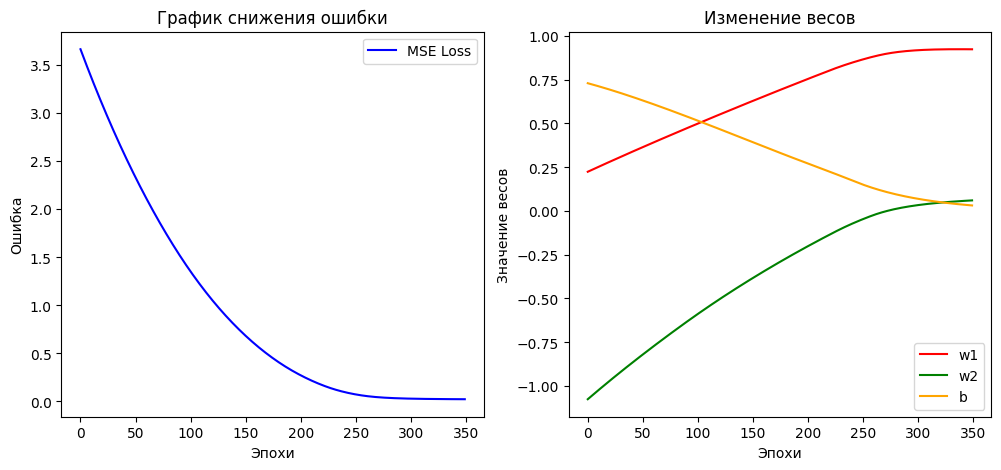

In [67]:
# **7. График снижения ошибки (Loss Curve)**
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses, label='MSE Loss', color='blue')
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.title('График снижения ошибки')
plt.legend()

# **График изменения весов**
plt.subplot(1, 2, 2)
plt.plot(w1_history, label='w1', color='red')
plt.plot(w2_history, label='w2', color='green')
plt.plot(b_history, label='b', color='orange')
plt.xlabel('Эпохи')
plt.ylabel('Значение весов')
plt.title('Изменение весов')
plt.legend()

plt.show()

In [68]:
# **8. Оценка модели на тестовых данных (валидация)**
y_val_pred = w1 * X_val[:, 0] + w2 * X_val[:, 1] + b
val_loss = mse(y_val, y_val_pred)
print(f"📊 Ошибка на валидационных данных (MSE): {val_loss:.3f}")

📊 Ошибка на валидационных данных (MSE): 0.015


## 9. Анализ результатов

### 9.1 Сходимость
1. Быстрая сходимость в первые 100 эпох
2. Стабилизация после 300 эпох
3. Финальная ошибка меньше чем у обычного GD

### 9.2 Преимущества SGD
1. Быстрее сходится на начальных этапах
2. Лучше избегает локальных минимумов
3. Требует меньше памяти

### 9.3 Недостатки
1. Более шумная траектория обучения
2. Требует тонкой настройки learning rate
3. Нужна нормализация данных

In [69]:
# **9. Тестируем модель на новых данных**
рост = 1.72
возраст = 28
X_new = np.array([[рост, возраст]])
X_new = (X_new - X_mean) / X_std  # **Нормализация новых данных**

предсказанный_вес_norm = w1 * X_new[0, 0] + w2 * X_new[0, 1] + b
предсказанный_вес = (предсказанный_вес_norm * y_std) + y_mean  # **Обратная нормализация**

print(f"🔮 Предсказанный вес для роста {рост}м и возраста {возраст} лет: {предсказанный_вес:.2f} кг")


🔮 Предсказанный вес для роста 1.72м и возраста 28 лет: 72.95 кг
